In [1]:
pip install seaborn matplotlib pandas scikit-learn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
##This is the ads amount spent by the company and the sale generated from that

df =  pd.read_csv("data/Advertising_data.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290
...,...,...,...,...
195,38.2,3.7,13.8,760
196,94.2,4.9,8.1,970
197,177.0,9.3,6.4,1280
198,283.6,42.0,66.2,2550


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


<Figure size 600x400 with 0 Axes>

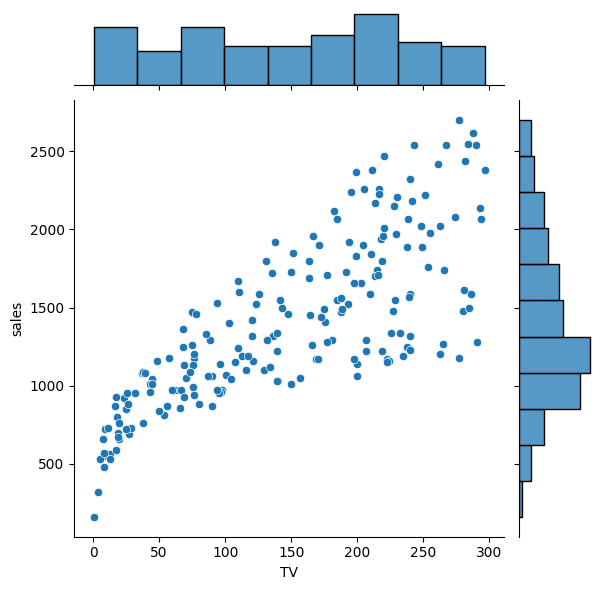

<Figure size 600x400 with 0 Axes>

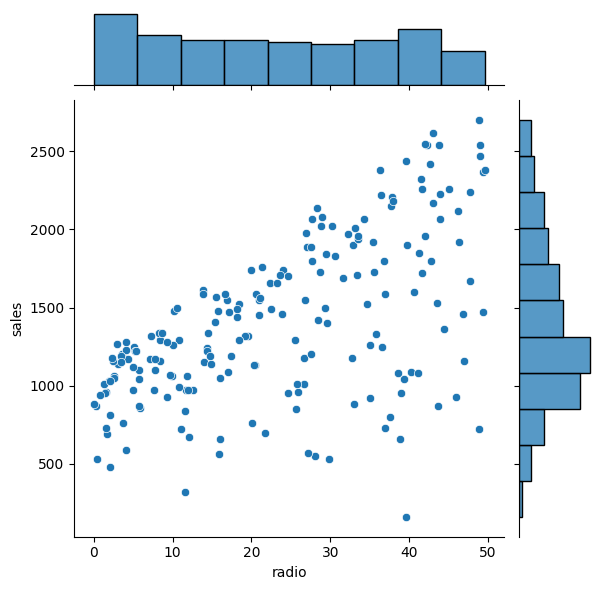

<Figure size 600x400 with 0 Axes>

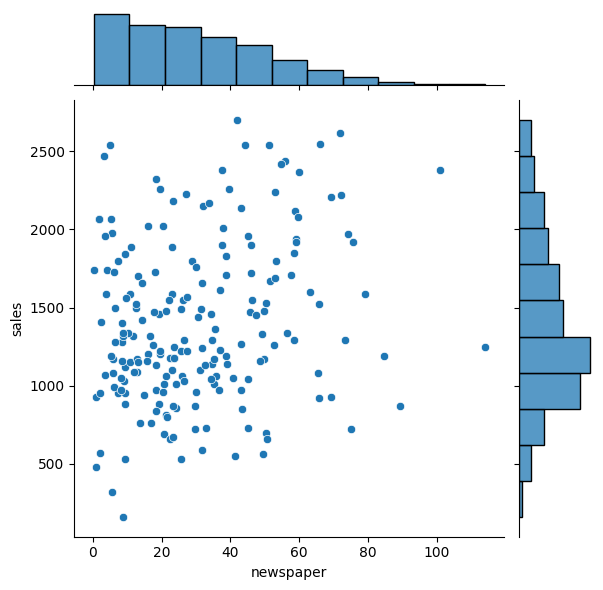

In [20]:
for col in df.columns:
    if col == "sales":
        continue
    plt.figure(figsize=(6,4))
    sns.jointplot(x=col,y="sales",data=df)
    plt.show()

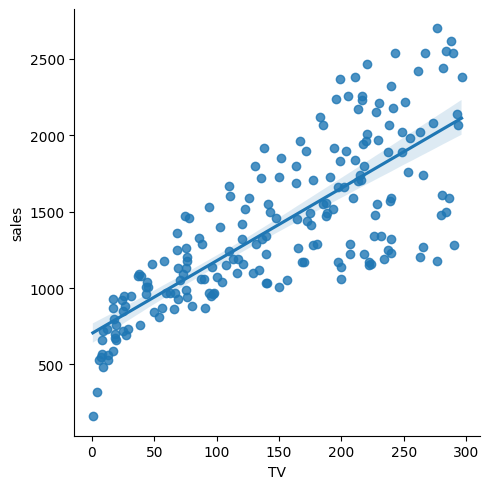

In [26]:
sns.lmplot(x = "TV",y="sales",data=df)

In [29]:
X = df[["TV","newspaper","radio"]]
y= df["sales"]
X

,TV,newspaper,radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8
...,...,...,...
195,38.2,13.8,3.7
196,94.2,8.1,4.9
197,177.0,6.4,9.3
198,283.6,66.2,42.0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [37]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)
train_y

169    1500
97     1550
31     1190
12      920
35     1280
       ... 
106     720
14     1900
92     1940
179    1260
102    1480
Name: sales, Length: 140, dtype: int64

In [43]:
model = LinearRegression()
model.fit(train_x,train_y)

coff = model.coef_
coff

array([ 4.4059281 ,  0.68824522, 19.92874969])

In [47]:
cdf = pd.DataFrame(coff,X.columns,columns=["coff"])
cdf

,coff
TV,4.405928
newspaper,0.688245
radio,19.928750


In [48]:
predict = model.predict(test_x)

mse = mean_squared_error(test_y,predict)
mae = mean_absolute_error(test_y,predict)
print("mse",mse)
print("mae",mae)


mse 37967.97236715221
mse 151.16692224549087
